## Lab 4 – Prediktiv Modell för Smart Home IoT

**Företag**: Smart Home Energy AB  
**Mål**: Förutsäga energiförbrukning baserat på andra sensorer

## Varför prediktiv modell?
- Förutsäga framtida energibehov
- Optimera energianvändning
- Upptäcka avvikelser (defekta apparater)

## Vad vi ska göra:
1. **Förbered data** - Välj relevanta kolumner
2. **Bygg modell** - Enkel Linear Regression
3. **Träna modell** - Lär modellen från historisk data
4. **Utvärdera** - Hur bra är modellen?
5. **Testa** - Gör prediktioner



In [105]:
# STEG 0: Installera sklearn (scikit-learn)
# Kör denna cell FÖRST!
%pip install scikit-learn

print("✅ scikit-learn installerad!")

Note: you may need to restart the kernel to use updated packages.
✅ scikit-learn installerad!



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
# STEG 1: Importera bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# För machine learning

import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    precision_recall_curve
)
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print(" Bibliotek importerade!")
print("Vi använder sklearn - världens enklaste ML-bibliotek")

 Bibliotek importerade!
Vi använder sklearn - världens enklaste ML-bibliotek


In [107]:
# STEG 2: Läs in ren data
data = pd.read_csv("../data/cleaned_raw_energydata.csv")

print(" DATA LADDAD")
print("=" * 60)
print(f"Antal rader: {len(data):,}")
print(f"Antal kolumner: {len(data.columns)}")
print(f"\nFörsta 3 rader:")
print(data.head(3))

 DATA LADDAD
Antal rader: 17,700
Antal kolumner: 29

Första 3 rader:
             Datum_Tid  Vitvaror_Energi_Wh  Belysning_Wh  Temp_Kök_C  \
0  2016-01-11 17:00:00                60.0            30       19.89   
1  2016-01-11 17:10:00                60.0            30       19.89   
2  2016-01-11 17:20:00                50.0            30       19.89   

   Fukt_Kök_Procent  Temp_Vardagsrum_C  Fukt_Vardagsrum_Procent  \
0         47.596667               19.2                44.790000   
1         46.693333               19.2                44.722500   
2         46.300000               19.2                44.626667   

   Temp_Tvättstuga_C  Fukt_Tvättstuga_Procent  Temp_Kontor_C  ...  \
0              19.79                44.730000      19.000000  ...   
1              19.79                44.790000      19.000000  ...   
2              19.79                44.933333      18.926667  ...   

   Temp_Föräldrarum_C  Fukt_Föräldrarum_Procent  Temp_Utomhus_Väderstation_C  \
0           17.0

### STEG 3: Förbered data för machine learning

**Vad ska vi förutsäga?**  
→ `Vitvaror_Energi_Wh` (Y = target)

**Vad ska vi använda för att förutsäga?**  
→ Temperatur, fuktighet, belysning (X = features)



In [108]:
# STEG 3: Välj features (X) och target (Y)

print(" VÄLJ DATA FÖR MODELLEN")
print("=" * 60)

# TARGET (vad vi vill förutsäga)
Y = data['Vitvaror_Energi_Wh']
print(f" Target (Y): Vitvaror_Energi_Wh")
print(f"   → Detta ska modellen lära sig förutsäga\n")

# FEATURES (vad vi använder för att förutsäga)
# Vi väljer enkla, logiska features
X = data[['Temp_Kök_C', 
          'Fukt_Kök_Procent',
          'Belysning_Wh',
          'Temp_Utomhus_Norr_C']]

print(f" Features (X): 4 kolumner")
print(f"   1. Temp_Kök_C - Temperatur i köket")
print(f"   2. Fukt_Kök_Procent - Fuktighet i köket") 
print(f"   3. Belysning_Wh - Belysning (indikerar aktivitet)")
print(f"   4. Temp_Utomhus_Norr_C - Väder påverkar kylskåp")

print(f"\n Data shape:")
print(f"   X: {X.shape} (rader, kolumner)")
print(f"   Y: {Y.shape} (rader)")

 VÄLJ DATA FÖR MODELLEN
 Target (Y): Vitvaror_Energi_Wh
   → Detta ska modellen lära sig förutsäga

 Features (X): 4 kolumner
   1. Temp_Kök_C - Temperatur i köket
   2. Fukt_Kök_Procent - Fuktighet i köket
   3. Belysning_Wh - Belysning (indikerar aktivitet)
   4. Temp_Utomhus_Norr_C - Väder påverkar kylskåp

 Data shape:
   X: (17700, 4) (rader, kolumner)
   Y: (17700,) (rader)


### Regression

In [109]:
# STEG 4: Dela data i träning och test

print("\n DELA DATA: TRÄNING vs TEST")
print("=" * 60)

# 80% träning, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f" Data uppdelad:")
print(f"   Träningsdata: {len(X_train):,} rader (80%)")
print(f"   Testdata: {len(X_test):,} rader (20%)")

print(f"\n Varför dela?")
print(f"   • Träna modellen på 80%")
print(f"   • Testa på 20% (data modellen aldrig sett)")
print(f"   • Detta visar hur bra modellen fungerar på ny data")


 DELA DATA: TRÄNING vs TEST
 Data uppdelad:
   Träningsdata: 14,160 rader (80%)
   Testdata: 3,540 rader (20%)

 Varför dela?
   • Träna modellen på 80%
   • Testa på 20% (data modellen aldrig sett)
   • Detta visar hur bra modellen fungerar på ny data


### STEG 5: Bygg och träna modellen

**Linear Regression** = Enklaste ML-modellen!

Modellen lär sig:
```
Energi = a₁×Temp + a₂×Fukt + a₃×Belysning + a₄×Temp_ute + b
```

Där a₁, a₂, a₃, a₄, b är koefficienter som modellen hittar själv!

In [110]:
# STEG 5: Skapa och träna modellen

print("\n BYGG MODELLEN")
print("=" * 60)

# Skapa modellen (1 rad kod!)
modell = LinearRegression()
print(" Modell skapad: Linear Regression")

# Träna modellen (1 rad kod!)
print("\n Tränar modellen...")
modell.fit(X_train, Y_train)
print(" Träning klar!")



 BYGG MODELLEN
 Modell skapad: Linear Regression

 Tränar modellen...
 Träning klar!


In [111]:
# STEG 6: Testa modellen (gör prediktioner)

print("\n TESTA MODELLEN")
print("=" * 60)

# Gör prediktioner på testdata
Y_pred = modell.predict(X_test)

print(f" Modellen har gjort {len(Y_pred):,} prediktioner!")

# Visa några exempel
print(f"\n EXEMPEL PÅ PREDIKTIONER:")
print(f"{'Verklig energi':>20} | {'Predikterad energi':>20} | {'Skillnad':>10}")
print("-" * 60)

for i in range(5):
    verklig = Y_test.iloc[i]
    predikterad = Y_pred[i]
    skillnad = abs(verklig - predikterad)
    print(f"{verklig:>17.0f} Wh | {predikterad:>17.0f} Wh | {skillnad:>7.0f} Wh")


 TESTA MODELLEN
 Modellen har gjort 3,540 prediktioner!

 EXEMPEL PÅ PREDIKTIONER:
      Verklig energi |   Predikterad energi |   Skillnad
------------------------------------------------------------
              120 Wh |                48 Wh |      72 Wh
              150 Wh |                86 Wh |      64 Wh
               70 Wh |                61 Wh |       9 Wh
               90 Wh |                76 Wh |      14 Wh
               70 Wh |                84 Wh |      14 Wh


In [112]:
# STEG 7: Utvärdera modellen

print("\n HUR BRA ÄR MODELLEN?")
print("=" * 60)

# Beräkna felmarginaler
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"1️ MAE (Mean Absolute Error): {mae:.1f} Wh")
print(f"   → Genomsnittligt fel: {mae:.1f} Wh")
print(f"   → Modellen missar i snitt med {mae:.1f} Wh")

print(f"\n2️ R² Score: {r2:.3f}")
print(f"   → Hur bra modellen förklarar variationen")
if r2 > 0.7:
    print(f"   →  BRA! Modellen förklarar {r2*100:.1f}% av variationen")
elif r2 > 0.5:
    print(f"   →  OK. Modellen förklarar {r2*100:.1f}% av variationen")
else:
    print(f"   →  DÅLIG. Modellen förklarar bara {r2*100:.1f}%")

# Sätt i perspektiv
medel_energi = Y_test.mean()
print(f"\n PERSPEKTIV:")
print(f"   Genomsnittlig energi: {medel_energi:.0f} Wh")
print(f"   Felmarginal: {mae:.0f} Wh ({mae/medel_energi*100:.1f}% av medel)")


 HUR BRA ÄR MODELLEN?
1️ MAE (Mean Absolute Error): 20.9 Wh
   → Genomsnittligt fel: 20.9 Wh
   → Modellen missar i snitt med 20.9 Wh

2️ R² Score: 0.167
   → Hur bra modellen förklarar variationen
   →  DÅLIG. Modellen förklarar bara 16.7%

 PERSPEKTIV:
   Genomsnittlig energi: 68 Wh
   Felmarginal: 21 Wh (30.6% av medel)


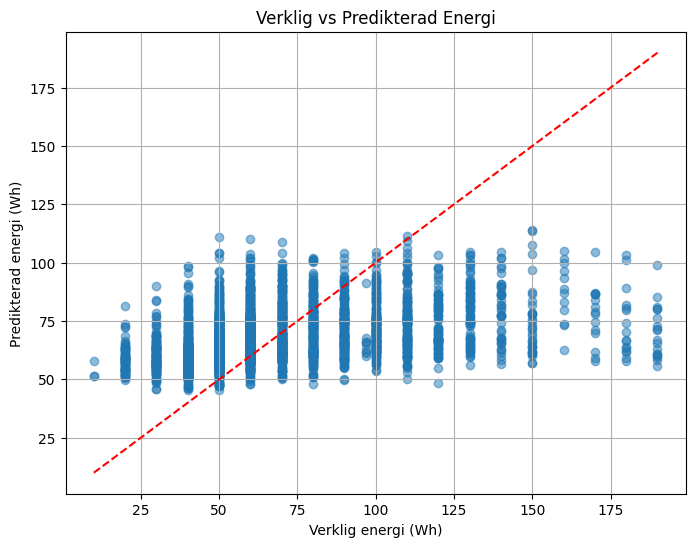

In [113]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Verklig energi (Wh)')
plt.ylabel('Predikterad energi (Wh)')
plt.title('Verklig vs Predikterad Energi')
plt.grid()
plt.show()


In [115]:
# 🔄 FÖRSÖK 2:MODELL med TID-baserade features

print("\nBYGG EN BÄTTRE MODELL")
print("=" * 60)

# Lägg till tidsbaserade features
data['Datum_Tid'] = pd.to_datetime(data['Datum_Tid'])
data['Timme'] = data['Datum_Tid'].dt.hour
#data['Dag_i_vecka'] = data['Datum_Tid'].dt.dayofweek  # 0=måndag, 6=söndag
#data['Är_helg'] = (data['Dag_i_vecka'] >= 5).astype(int)  # 1=helg, 0=vardag

# NYA features (logiska!)
X_bättre = data[['Timme']]

Y_bättre = data['Vitvaror_Energi_Wh']

print(" NYA FEATURES (tid-baserade):")
print("   1. Timme (0-23) - När på dygnet?")
#print("   2. Dag_i_vecka (0-6) - Måndag till söndag")
#print("   3. Är_helg (0/1) - Olika beteende helg vs vardag")


# Dela och träna
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    X_bättre, Y_bättre, test_size=0.2, random_state=42
)

modell2 = LinearRegression()
modell2.fit(X_train2, Y_train2)
Y_pred2 = modell2.predict(X_test2)

# Utvärdera
mae2 = mean_absolute_error(Y_test2, Y_pred2)
r2_2 = r2_score(Y_test2, Y_pred2)

print(f"\n RESULTAT-JÄMFÖRELSE:")
print(f"{'Metrik':20} | {'Gammal (temp/fukt)':>20} | {'NY (tid-baserad)':>20}")
print("-" * 70)
print(f"{'R² Score':20} | {r2:>20.3f} | {r2_2:>20.3f}")
print(f"{'MAE (fel i Wh)':20} | {mae:>20.1f} | {mae2:>20.1f}")




BYGG EN BÄTTRE MODELL
 NYA FEATURES (tid-baserade):
   1. Timme (0-23) - När på dygnet?

 RESULTAT-JÄMFÖRELSE:
Metrik               |   Gammal (temp/fukt) |     NY (tid-baserad)
----------------------------------------------------------------------
R² Score             |                0.167 |                0.165
MAE (fel i Wh)       |                 20.9 |                 20.5


### STEG 9: Använd modellen för nya prediktioner

Nu kan vi förutsäga energi för **nya** situationer!

In [116]:
ny_data = [[12]]  # Exempel: kl 12 på en tisdag (vardag) med 300 Wh belysning
prediktion_ny = modell2.predict(ny_data)
print(f"\nEXEMPEL PÅ NY PREDIKTION MED TID-BASERADE FEATURES:")
print(f" Vid kl 12 :")
print(f"  Predikterad Vitvaror_Energi_Wh: {prediktion_ny[0]:.0f} Wh")
mean_timme_12 = data[data['Timme'] == 12]['Vitvaror_Energi_Wh'].mean()
print(f"  Medel energi kl 12: {mean_timme_12:.1f} Wh")
max_vitvaror = data['Vitvaror_Energi_Wh'].max()
print(f"  Max Vitvaror_Energi_Wh i datasetet: {max_vitvaror:.0f} Wh")



EXEMPEL PÅ NY PREDIKTION MED TID-BASERADE FEATURES:
 Vid kl 12 :
  Predikterad Vitvaror_Energi_Wh: 70 Wh
  Medel energi kl 12: 76.2 Wh
  Max Vitvaror_Energi_Wh i datasetet: 190 Wh


c:\Users\marya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


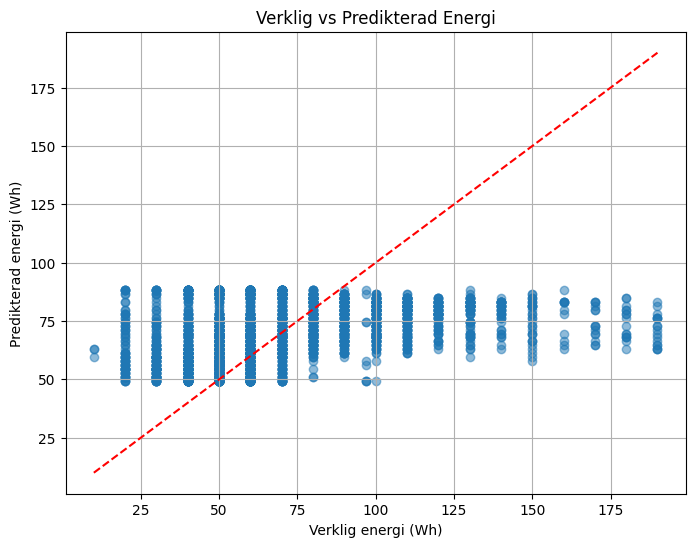

In [117]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test2, Y_pred2, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Verklig energi (Wh)')
plt.ylabel('Predikterad energi (Wh)')
plt.title('Verklig vs Predikterad Energi')
plt.grid()
plt.show()

###  PROBLEM: Modellen är DÅLIG!

Vi ser att R² är mycket låg (~0.08) = modellen förklarar bara 8% av variationen!

## Varför funkar den inte?

 **Vi valde FEL features!**

**Problem med våra features:**
- `Temp_Kök_C` → Folk lagar INTE mat för att det är varmt
- `Fukt_Kök_Procent` → Diskmaskin körs inte pga fuktighet  
- `Belysning_Wh` → Lite koppling, men inte nog
- `Temp_Utomhus_Norr_C` → Påverkar bara kylskåp lite

**Vad bestämmer EGENTLIGEN energiförbrukningen?**
-  **TID på dygnet** (kl 18 = matlagning)
-  **Dag i veckan** (helg vs vardag)
-  **Beteendemönster** (när folk är hemma)

##  VIKTIGA LÄRDOMAR:

1. **"Garbage in, garbage out"**  
   Om features inte har stark koppling till target → dålig modell

2. **Machine Learning är inte magi**  
   Den kan bara lära sig från features vi ger den

3. **Tänk logiskt INNAN du väljer features**  
   Fråga: "Vad PÅVERKAR egentligen det jag vill förutsäga?"



### Linjär regression

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y = data['Fukt_Badrum_Procent']

X = data[[
    'Temp_Badrum_C','Temp_Utomhus_Väderstation_C',
    'Fukt_Utomhus_Väderstation_Procent','Temp_Kök_C','Temp_Vardagsrum_C',
    'Temp_Tvättstuga_C','Fukt_Kök_Procent','Daggpunkt_C'
]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Koefficient": model.coef_
})
coeffs.sort_values(by="Koefficient", ascending=False)


MAE: 5.952907657486762
MSE: 133.2892180628759
R²: 0.09516256061645556


,Feature,Koefficient
0,Temp_Badrum_C,2.395306
6,Fukt_Kök_Procent,0.869293
4,Temp_Vardagsrum_C,0.656946
3,Temp_Kök_C,0.479137
7,Daggpunkt_C,0.073902
2,Fukt_Utomhus_Väderstation_Procent,-0.013748
1,Temp_Utomhus_Väderstation_C,-0.486595
5,Temp_Tvättstuga_C,-2.834710


### Random forest regression

In [119]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_reg.fit(X_train, y_train)

y_pred_rf_reg = rf_reg.predict(X_test)

print("\nRandom Forest Regression")
print("R2:", r2_score(y_test, y_pred_rf_reg))
#print("RMSE:", mean_squared_error(y_test, y_pred_rf_reg, squared=False))



Random Forest Regression
R2: 0.4395591233147217


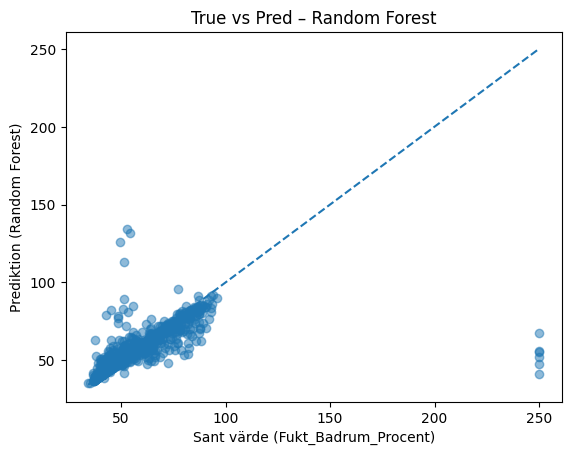

In [120]:
plt.figure()
plt.scatter(y_test, y_pred_rf_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Sant värde (Fukt_Badrum_Procent)")
plt.ylabel("Prediktion (Random Forest)")
plt.title("True vs Pred – Random Forest")
plt.show()

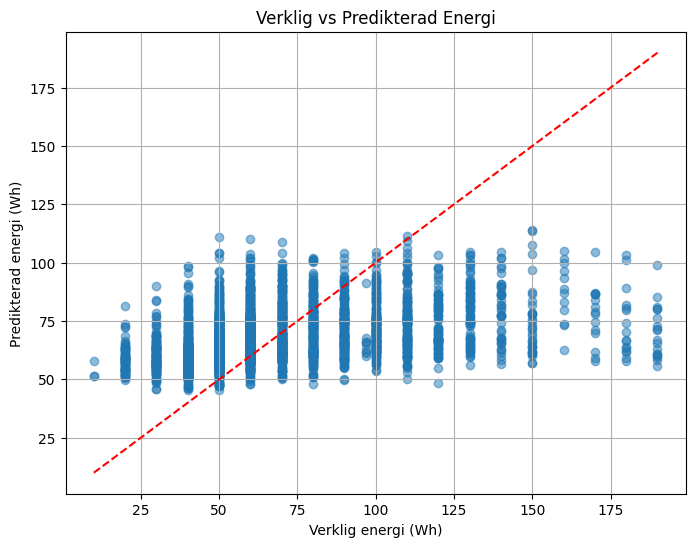

In [121]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Verklig energi (Wh)')
plt.ylabel('Predikterad energi (Wh)')
plt.title('Verklig vs Predikterad Energi')
plt.grid()
plt.show()


### Random forest regression


In [125]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_reg.fit(X_train, Y_train)

y_pred_rf_reg = rf_reg.predict(X_test)

print("\nRandom Forest Regression")
print("R2:", r2_score(y_test, y_pred_rf_reg))


Random Forest Regression
R2: -5.455004711512156


In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)

plt.xlabel("Verklig temperatur i kök (°C)")
plt.ylabel("Predikterad temperatur i kök (°C)")
plt.title("Verkligt vs Predikterat – Temp i kök")

# rita en linje som visar 'perfekta' prediktioner
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2)

plt.grid(True)
plt.show()

### Klassificering

In [ ]:
# Skapa en kategori:
# 1 = hög temperatur
# 0 = låg temperatur
data["Hög_fukt_bad"] = (data["Fukt_Badrum_Procent"] > 60).astype(int)

print(data[["Fukt_Badrum_Procent", "Hög_fukt_bad"]].head(20))

In [ ]:
x_clf =data[[
    'Temp_Badrum_C','Temp_Utomhus_Väderstation_C',]]
y_clf = data[['Hög_fukt_bad']]

X_train, X_test, Y_train, Y_test = train_test_split(
    x_clf, y_clf, test_size=0.2, random_state=42)


### Logistik regression (klassificering)

In [ ]:
log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    solver="liblinear"   
)
log_reg.fit(X_train, Y_train)

y_pred_log = log_reg.predict(X_test)

print("\nLogistisk regression")
print("Accuracy:", accuracy_score(Y_test, y_pred_log))

precision = precision_score(Y_test, y_pred_log)
recall = recall_score(Y_test, y_pred_log)

print("Precision:", precision)
print("Recall:", recall)

PRECISION (Hur ofta modellen har rätt när den säger JA)

RECALL (Hur många riktiga 1:or modellen lyckas hitta)

PRECISION

“När modellen säger JA – hur ofta har den rätt?”

RECALL

“Av alla riktiga JA – hur många hittar modellen?”

In [ ]:
cm_log = confusion_matrix(Y_test, y_pred_log)

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

### Random forest classifier

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_clf.fit(X_train, Y_train)

y_pred_rf_clf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(Y_test, y_pred_rf_clf))
precision = precision_score(Y_test, y_pred_rf_clf)
recall = recall_score(Y_test, y_pred_rf_clf)

print("Precision:", precision)
print("Recall:", recall)


In [ ]:
cm_rf = confusion_matrix(Y_test, y_pred_rf_clf)

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Prediktion")
plt.ylabel("Sant värde")
plt.show()

In [ ]:
import pandas as pd

importances = rf_clf.feature_importances_
features = x_clf.columns

df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(df.sort_values('Importance', ascending=False))

### SAMMANFATTNING

##  Vad vi har gjort:

1. **Förberedt data** → Valt 4 features för att förutsäga energi
2. **Byggt modell** → Linear Regression (superenkelt!)
3. **Tränat** → Modellen lärde sig från 80% av datan
4. **Testat** → Utvärderat på 20% ny data
5. **Utvärderat** → MAE och R² score
6. **Visualiserat** → Grafer för att förstå resultat
7. **Använt** → Gjort prediktioner på nya situationer

##  Business-värde:

- **Förutsäga** framtida energibehov
- **Optimera** energianvändning
- **Upptäcka** avvikelser (om verklig >> predikterad → defekt apparat?)